In [1]:
print('Hello World')

Hello World


In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
pd.options.display.max_rows = 999
pd.set_option("expand_frame_repr", True)


In [3]:
# Getting data through walk score API
# https://medium.com/@cheng.cesar/15-min-city-8c00dbe279fc

#Walk score API doesn't work for non institutional attempts as a responde of the API Walkscore Customer Service

In [4]:
#import geopandas as gpd
#geopandas missing at this point ? instead reimported Pandas as above?
import pandas as pd
import matplotlib.pyplot as plt

# graph networks
import networkx as nx 

# open street map data
# pip install osmnx
import osmnx as ox

from shapely.geometry import Point

In [5]:
# Define parameters here
place = 'Düsseldorf,Germany'
network_type = 'walk'
trip_times = [5,10,15,20] # in minutes
# travel_speed = 4.5 #walking speed in km/hour
Graph = ox.graph_from_address(place,network_type=network_type)

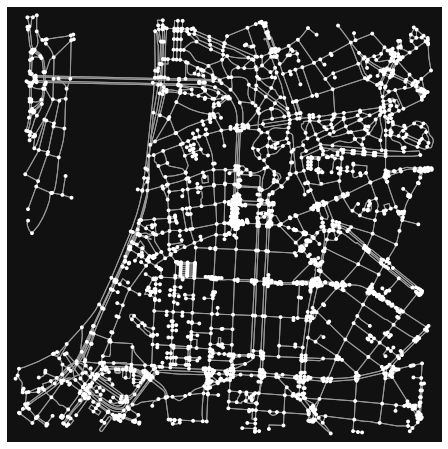

In [6]:
# Map of Düsseldorf
fig, ax = ox.plot_graph(ox.project_graph(Graph))

In [7]:
# choose DD point in Düsseldorf
# right click in google maps to find coordinate
center = (51.22032993226174, 6.794254347032914)
center_node = ox.get_nearest_node(Graph, center)

In [8]:
#time attribute assigned to each edge
meters_per_minute = travel_speed * 1000 / 60 
for u, v, k, data in Graph.edges(data=True, keys=True):
    data['time'] = data['length'] / meters_per_minute

NameError: name 'travel_speed' is not defined

In [ ]:
# color area that can be reached within specified time periods (5, 10, ...)

# get one color for each isochrone
iso_colors = ox.plot.get_colors(n=len(trip_times), cmap='plasma', start=0, return_hex=True)
node_colors = {}
for trip_time, color in zip(sorted(trip_times, reverse=True), iso_colors):
    subgraph = nx.ego_graph(Graph, center_node, radius=trip_time,  distance='time')
    for node in subgraph.nodes():
        node_colors[node] = color
nc = [node_colors[node] if node in node_colors else 'none' for node in Graph.nodes()]
ns = [15 if node in node_colors else 0 for node in Graph.nodes()]
# plot graph
fig, ax = ox.plot_graph(Graph, node_color=nc, node_size=ns, node_alpha=0.8, node_zorder=2,
                        bgcolor='k', edge_linewidth=0.2, edge_color='#999999')

### Walkscore between Center and Adress

In [ ]:
# Walk score from Düsseldorf HBf to Rewe
# pip install walkscore-api 

from walkscore import WalkScoreAPI
# wasn't able to get a key
api_key = "8f227f8bf72f5e084ebf2ce322118041" # can we use this key?
walkscore_api = WalkScoreAPI(api_key = api_key)
address = 'Friedrichstraße 40a, 40217 Düsseldorf' # is this just a spot chosen by you? 
result = walkscore_api.get_score(latitude = center[0], longitude = center[1], address = address)

# the WalkScore for the location
print(f"Walk score for Düsseldorf HBf to Rewe: {result.walk_score}")

### distance between two points

In [9]:
# get graph for Düsseldorf
place = 'Düsseldorf, Germany'
network_type = 'walk'
#G = ox.graph_from_place(place, network_type=network_type)
G = ox.graph_from_address(place, network_type=network_type, dist=5000)

In [10]:
# get distance between two points
# not useful for our case

point_1 = (51.22032993226174, 6.794254347032914)
point_2 = (51.215050919169656, 6.777300331590118)

y1 = point_1[0]
x1 = point_1[1]
y2 = point_2[0]
x2 = point_2[1]

ox.distance.euclidean_dist_vec(y1, x1, y2, x2)

0.017756875256107477

In [12]:
# get distance between two points

point_1 = (51.22032993226174, 6.794254347032914) #center
point_2 = (51.215050919169656, 6.777300331590118) # rewe, but how did you get the points? Walkscore API? but it didn't return the actual point?

orig_node = ox.get_nearest_node(G, point_1)
dest_node = ox.get_nearest_node(G, point_2)

dist_m = nx.shortest_path_length(G, orig_node, dest_node, weight='length')

print(f"The distance between the two points is {round(dist_m, 2)} meters.")
# to recreate distances get all apiscores in variables? point_3; point_4

The distance between the two points is {round(dist_m, 2)} meters.


### Point of Interests around specified point

In [13]:
# get list of places in Düsseldorf
# https://wiki.openstreetmap.org/wiki/Map_features#Transportation

tags = {'amenity':True, 'landuse':['retail','commercial','transportation', 'education']} 
places_df = ox.geometries.geometries_from_address(place, tags=tags)
places_df = places_df.reset_index(level=[0,1])
places_df

#now fetching data from the OSMnx package not the walkscore anymore. Here you have points in collums geometry

element_type      osmid           amenity  check_date  source  \
0            node  240270700         telephone  2021-03-12  survey   
1            node  240270717  parking_entrance         NaN     NaN   
2            node  240270723              cafe         NaN  survey   
3            node  240270745               pub         NaN  survey   
4            node  240270787          post_box         NaN     NaN   
...           ...        ...               ...         ...     ...   
1547     relation       8607            police         NaN     NaN   
1548     relation    1965896   public_building         NaN     NaN   
1549     relation    4785870            school         NaN     NaN   
1550     relation    6390053               NaN         NaN     NaN   
1551     relation   10542133               NaN         NaN     NaN   

                                               geometry  fee  \
0                              POINT (6.78976 51.22756)  NaN   
1                              POINT (6.78733 51.22615)  yes   
2                              POINT (6.78746 51.22174)  NaN   
3                              POINT (6.78796 51.22126)  NaN   
4                              POINT (6.78729 51.21945)  NaN   
...                                                 ...  ...   
1547  POLYGON ((6.76765 51.21569, 6.76763 51.21567, ...  NaN   
1548  POLYGON ((6.76966 51.22234, 6.76976 51.22248, ...  NaN   
1549  MULTIPOLYGON (((6.78731 51.23520, 6.78733 51.2...  NaN   
1550  POLYGON ((6.77846 51.22558, 6.77726 51.22556, ...  NaN   
1551  POLYGON ((6.77683 51.22302, 6.77697 51.22296, ...  NaN   

                          name       parking wheelchair  ...  \
0                          NaN           NaN        NaN  ...   
1            Karstadt Parkhaus  multi-storey        yes  ...   
2            Zaxopondeiva Cafe           NaN    limited  ...   
3        Wilma Next Generation           NaN    limited  ...   
4                          NaN           NaN        NaN  ...   
...                        ...           ...        ...  ...   
1547          Polizeipräsidium           NaN        yes  ...   
1548               Palais Spee           NaN        NaN  ...   
1549  Matthias-Claudius-Schule           NaN        NaN  ...   
1550                       NaN           NaN        NaN  ...   
1551                       NaN           NaN        NaN  ...   

     maxstay:conditional construction:end_date construction:start_date  \
0                    NaN                   NaN                     NaN   
1                    NaN                   NaN                     NaN   
2                    NaN                   NaN                     NaN   
3                    NaN                   NaN                     NaN   
4                    NaN                   NaN                     NaN   
...                  ...                   ...                     ...   
1547                 NaN                  1932                    1929   
1548                 NaN                   NaN                     NaN   
1549                 NaN                   NaN                     NaN   
1550                 NaN                   NaN                     NaN   
1551                 NaN                   NaN                     NaN   

     quitting_hours building:use:residential building:part room  \
0               NaN                      NaN           NaN  NaN   
1               NaN                      NaN           NaN  NaN   
2               NaN                      NaN           NaN  NaN   
3               NaN                      NaN           NaN  NaN   
4               NaN                      NaN           NaN  NaN   
...             ...                      ...           ...  ...   
1547            NaN                      NaN           NaN  NaN   
1548            NaN                      NaN           NaN  NaN   
1549            NaN                      NaN           NaN  NaN   
1550            NaN                      NaN           NaN  NaN   


In [14]:
# filter dataframe
places_filt_df = places_df[places_df["element_type"]=="node"]
places_filt_df

#why filter for node?

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


element_type       osmid           amenity  check_date  source  \
0            node   240270700         telephone  2021-03-12  survey   
1            node   240270717  parking_entrance         NaN     NaN   
2            node   240270723              cafe         NaN  survey   
3            node   240270745               pub         NaN  survey   
4            node   240270787          post_box         NaN     NaN   
...           ...         ...               ...         ...     ...   
1377         node  9073199797   vending_machine         NaN     NaN   
1378         node  9073200627   bicycle_parking         NaN     NaN   
1379         node  9073201970      waste_basket         NaN     NaN   
1380         node  9073202692   vending_machine         NaN     NaN   
1381         node  9073203128             bench         NaN     NaN   

                      geometry  fee                   name       parking  \
0     POINT (6.78976 51.22756)  NaN                    NaN           NaN   
1     POINT (6.78733 51.22615)  yes      Karstadt Parkhaus  multi-storey   
2     POINT (6.78746 51.22174)  NaN      Zaxopondeiva Cafe           NaN   
3     POINT (6.78796 51.22126)  NaN  Wilma Next Generation           NaN   
4     POINT (6.78729 51.21945)  NaN                    NaN           NaN   
...                        ...  ...                    ...           ...   
1377  POINT (6.78202 51.22308)  NaN                    NaN           NaN   
1378  POINT (6.78355 51.22140)  NaN                    NaN           NaN   
1379  POINT (6.78974 51.22079)  NaN                    NaN           NaN   
1380  POINT (6.78131 51.22318)  NaN                    NaN           NaN   
1381  POINT (6.78593 51.22286)  NaN                    NaN           NaN   

     wheelchair  ... maxstay:conditional construction:end_date  \
0           NaN  ...                 NaN                   NaN   
1           yes  ...                 NaN                   NaN   
2       limited  ...                 NaN                   NaN   
3       limited  ...                 NaN                   NaN   
4           NaN  ...                 NaN                   NaN   
...         ...  ...                 ...                   ...   
1377        NaN  ...                 NaN                   NaN   
1378        NaN  ...                 NaN                   NaN   
1379        NaN  ...                 NaN                   NaN   
1380        NaN  ...                 NaN                   NaN   
1381        NaN  ...                 NaN                   NaN   

     construction:start_date quitting_hours building:use:residential  \
0                        NaN            NaN                      NaN   
1                        NaN            NaN                      NaN   
2                        NaN            NaN                      NaN   
3                        NaN            NaN                      NaN   
4                        NaN            NaN                      NaN   
...                      ...            ...                      ...   
1377                     NaN            NaN                      NaN   
1378                     NaN            NaN                      NaN   
1379                     NaN            NaN                      NaN   
1380                     NaN            NaN                      NaN   
1381                     NaN            NaN                      NaN   

     building:part room parking:orientation ways building:roof:shape  
0              NaN  NaN                 NaN  NaN                 NaN  
1              NaN  NaN                 NaN  NaN                 NaN  
2              NaN  NaN                 NaN  NaN                 NaN  
3              NaN  NaN                 NaN  NaN                 NaN  
4              NaN  NaN                 NaN  NaN                 NaN  
...            ...  ...                 ...  ...                 ...  
1377           NaN  NaN                 NaN  NaN                 NaN  
1378         

In [15]:
# list all types of amenities (top 25 by count)
places_filt_df[["amenity"]].value_counts()

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


amenity           
restaurant            200
bench                 192
waste_basket          117
bicycle_parking       106
vending_machine       101
cafe                   71
pub                    70
fast_food              46
recycling              38
post_box               37
bar                    29
telephone              29
atm                    29
parking_entrance       29
taxi                   25
bank                   23
doctors                21
nightclub              21
pharmacy               18
parking                17
toilets                17
theatre                12
fountain               12
kindergarten           10
clock                  10
shelter                 9
library                 8
charging_station        8
ice_cream               8
dentist                 7
motorcycle_parking      7
post_office             5
cinema                  4
arts_centre             4
social_facility         4
police                  3
ticket_validator        3
college            

In [16]:
# define list of important places
important_places_list = [
    "biergarten", "college", "gambling"
]

In [17]:
# filter by important places
places_filt_df = places_filt_df[places_filt_df["amenity"].isin(important_places_list)]
places_filt_df.reset_index(drop=True, inplace=True)
places_filt_df

element_type       osmid     amenity check_date source  \
0         node   481083583    gambling        NaN    NaN   
1         node   666210219     college        NaN    NaN   
2         node  2782005179     college        NaN    NaN   
3         node  4760469210    gambling        NaN    NaN   
4         node  7089723985  biergarten        NaN    NaN   

                   geometry  fee  \
0  POINT (6.77236 51.22637)  NaN   
1  POINT (6.78605 51.21875)  NaN   
2  POINT (6.77593 51.22467)  NaN   
3  POINT (6.77672 51.21801)  NaN   
4  POINT (6.77278 51.22600)  NaN   

                                                name parking wheelchair  ...  \
0                                  Merkur Spielothek     NaN        NaN  ...   
1  Düsseldorfer Akademie für Marketing-Kommunikation     NaN         no  ...   
2         Internationales Bildungszentrum Die Brücke     NaN        NaN  ...   
3                                Magic 21 Spielhalle     NaN        NaN  ...   
4                                         da spiegel     NaN        NaN  ...   

  maxstay:conditional construction:end_date construction:start_date  \
0                 NaN                   NaN                     NaN   
1                 NaN                   NaN                     NaN   
2                 NaN                   NaN                     NaN   
3                 NaN                   NaN                     NaN   
4                 NaN                   NaN                     NaN   

  quitting_hours building:use:residential building:part room  \
0            NaN                      NaN           NaN  NaN   
1            NaN                      NaN           NaN  NaN   
2            NaN                      NaN           NaN  NaN   
3            NaN                      NaN           NaN  NaN   
4            NaN                      NaN           NaN  NaN   

  parking:orientation ways building:roof:shape  
0                 NaN  NaN                 NaN  
1                 NaN  NaN                 NaN  
2                 NaN  NaN                 NaN  
3                 NaN  NaN                 NaN  
4                 NaN  NaN                 NaN  

[5 rows x 289 columns]

### Plot map between two Points as an exemple

In [18]:
# get graph for Düsseldorf
place = 'Düsseldorf, Germany'
network_type = 'walk'
G = ox.graph_from_address(place, network_type=network_type, dist=3000)

#why do we have a different distance then before? 
#Do we get the data used at this spot from the API?

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
# take random point from table
point = places_filt_df.at[0, "geometry"]  
text = places_filt_df.at[0, "name"]
#what does at stand for?

# define second point
center = (6.794692454576966, 51.22040873411635)
point_center = Point(center)

In [25]:
places_filt_df

element_type       osmid     amenity check_date source  \
0         node   481083583    gambling        NaN    NaN   
1         node   666210219     college        NaN    NaN   
2         node  2782005179     college        NaN    NaN   
3         node  4760469210    gambling        NaN    NaN   
4         node  7089723985  biergarten        NaN    NaN   

                   geometry  fee  \
0  POINT (6.77236 51.22637)  NaN   
1  POINT (6.78605 51.21875)  NaN   
2  POINT (6.77593 51.22467)  NaN   
3  POINT (6.77672 51.21801)  NaN   
4  POINT (6.77278 51.22600)  NaN   

                                                name parking wheelchair  ...  \
0                                  Merkur Spielothek     NaN        NaN  ...   
1  Düsseldorfer Akademie für Marketing-Kommunikation     NaN         no  ...   
2         Internationales Bildungszentrum Die Brücke     NaN        NaN  ...   
3                                Magic 21 Spielhalle     NaN        NaN  ...   
4                                         da spiegel     NaN        NaN  ...   

  maxstay:conditional construction:end_date construction:start_date  \
0                 NaN                   NaN                     NaN   
1                 NaN                   NaN                     NaN   
2                 NaN                   NaN                     NaN   
3                 NaN                   NaN                     NaN   
4                 NaN                   NaN                     NaN   

  quitting_hours building:use:residential building:part room  \
0            NaN                      NaN           NaN  NaN   
1            NaN                      NaN           NaN  NaN   
2            NaN                      NaN           NaN  NaN   
3            NaN                      NaN           NaN  NaN   
4            NaN                      NaN           NaN  NaN   

  parking:orientation ways building:roof:shape  
0                 NaN  NaN                 NaN  
1                 NaN  NaN                 NaN  
2                 NaN  NaN                 NaN  
3                 NaN  NaN                 NaN  
4                 NaN  NaN                 NaN  

[5 rows x 289 columns]

In [20]:
# find node on map based on coordinates
point_temp = (point.y, point.x)
orig_node = ox.get_nearest_node(G, point_temp)

center_temp = (point_center.y, point_center.x)
dest_node = ox.get_nearest_node(G, center_temp)

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


In [21]:
# calculate distance between two nodes
dist_m = nx.shortest_path_length(G, orig_node, dest_node, weight='length')

print(f"The distance between the two points is {round(dist_m)} meters.")

The distance between the two points is 1979 meters.


/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:
# calculate travel time between two nodes
# 1 meter in 0.0133 minutes (4.5 km/h)

time = round(dist_m*0.0133)
print(f"Travel time: {time} minutes")

Travel time: 26 minutes


Text(0, 0, 'The distance between the two points is 1979 meters.\nTravel time: 26 minutes')

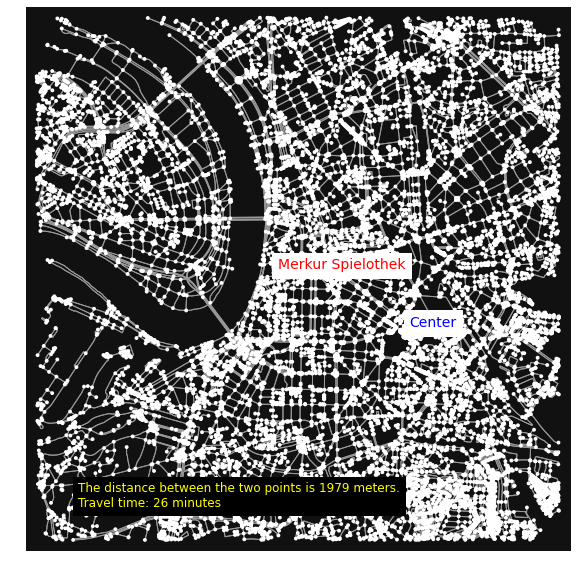

In [23]:
# plot whole map
ox.plot_graph(G, figsize=(10, 10), show=False, close=False)

# Point of Interest
plt.scatter(point.x, point.y, color="red") # plot point of POI
plt.text(1.0001*point.x, point.y, text, backgroundcolor="white",
         color="red", size=14) # plot name of POI

# Defined center
plt.scatter(point_center.x, point_center.y, color="blue") # plot point of center
plt.text(point_center.x, point_center.y, "Center", backgroundcolor="white",
         color="blue", size=14) # plot name of center

# plot information
plt.text(0, 0, f"The distance between the two points is {round(dist_m)} meters.\nTravel time: {time} minutes",
         transform=ax.transAxes, color="yellow", backgroundcolor="black", size=12)

### Loop through all selected places and create map + information

In [26]:
def calc_dist_and_time(point_1, point_2):
    
    # find node on map based on coordinates
    point_1_temp = (point_1.y, point_1.x)
    point_1_node = ox.get_nearest_node(G, point_1_temp)

    point_2_temp = (point_1.y, point_2.x)
    point_2_node = ox.get_nearest_node(G, point_2_temp)
    
    # calculate distance between two nodes
    dist_m = nx.shortest_path_length(G, point_1_node, point_2_node, weight='length')
    
    # calculate travel time based on 4.5km/h
    time = round(dist_m*0.0133)
    
    # return
    return dist_m, time

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
def plot_map(point_1, text_1, point_2, text_2):
    
    # plot whole map
    ox.plot_graph(G, figsize=(10, 10), show=False, close=False)

    # Point of Interest
    plt.scatter(point_1.x, point_1.y, color="red") # plot point of POI
    plt.text(1.0001*point_1.x, point_1.y, text_1, backgroundcolor="white",
             color="red", size=14) # plot name of POI

    # Defined center
    plt.scatter(point_2.x, point_2.y, color="blue") # plot point of center
    plt.text(point_2.x, point_2.y, text_2, backgroundcolor="white",
             color="blue", size=14) # plot name of center

    # plot information
    meta_data = calc_dist_and_time(point_1, point_2)
    dist_m = meta_data[0]
    time = meta_data[1]
    plt.text(0, 0, f"The distance between the two points is {round(dist_m)} meters.\nTravel time: {time} minutes",
             transform=ax.transAxes, color="yellow", backgroundcolor="black", size=12)
    
    plt.show()

In [28]:
# define main station as center / point 1
point_1 = Point(6.794692454576966, 51.22040873411635)
text_1 = "Düsseldorf main station"

In [29]:
places_filt_df

element_type       osmid     amenity check_date source  \
0         node   481083583    gambling        NaN    NaN   
1         node   666210219     college        NaN    NaN   
2         node  2782005179     college        NaN    NaN   
3         node  4760469210    gambling        NaN    NaN   
4         node  7089723985  biergarten        NaN    NaN   

                   geometry  fee  \
0  POINT (6.77236 51.22637)  NaN   
1  POINT (6.78605 51.21875)  NaN   
2  POINT (6.77593 51.22467)  NaN   
3  POINT (6.77672 51.21801)  NaN   
4  POINT (6.77278 51.22600)  NaN   

                                                name parking wheelchair  ...  \
0                                  Merkur Spielothek     NaN        NaN  ...   
1  Düsseldorfer Akademie für Marketing-Kommunikation     NaN         no  ...   
2         Internationales Bildungszentrum Die Brücke     NaN        NaN  ...   
3                                Magic 21 Spielhalle     NaN        NaN  ...   
4                                         da spiegel     NaN        NaN  ...   

  maxstay:conditional construction:end_date construction:start_date  \
0                 NaN                   NaN                     NaN   
1                 NaN                   NaN                     NaN   
2                 NaN                   NaN                     NaN   
3                 NaN                   NaN                     NaN   
4                 NaN                   NaN                     NaN   

  quitting_hours building:use:residential building:part room  \
0            NaN                      NaN           NaN  NaN   
1            NaN                      NaN           NaN  NaN   
2            NaN                      NaN           NaN  NaN   
3            NaN                      NaN           NaN  NaN   
4            NaN                      NaN           NaN  NaN   

  parking:orientation ways building:roof:shape  
0                 NaN  NaN                 NaN  
1                 NaN  NaN                 NaN  
2                 NaN  NaN                 NaN  
3                 NaN  NaN                 NaN  
4                 NaN  NaN                 NaN  

[5 rows x 289 columns]

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


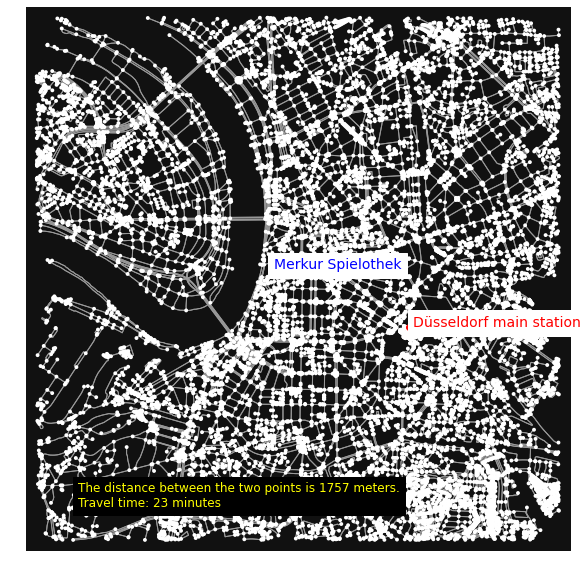

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


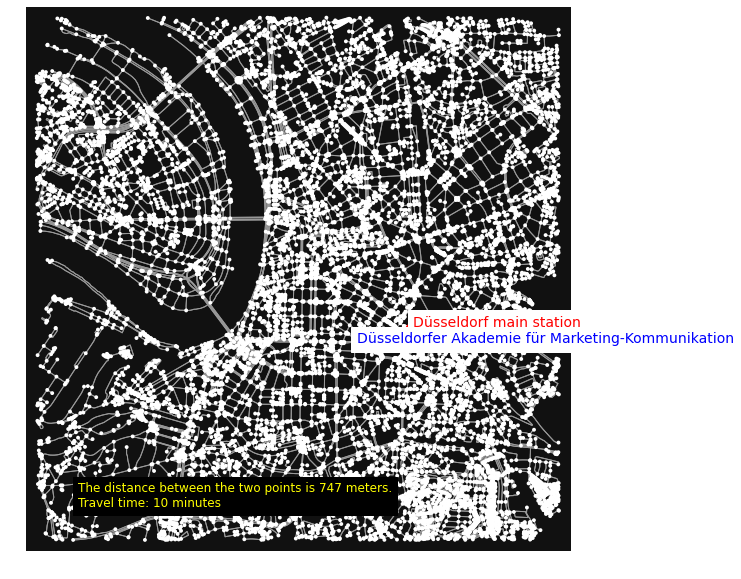

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


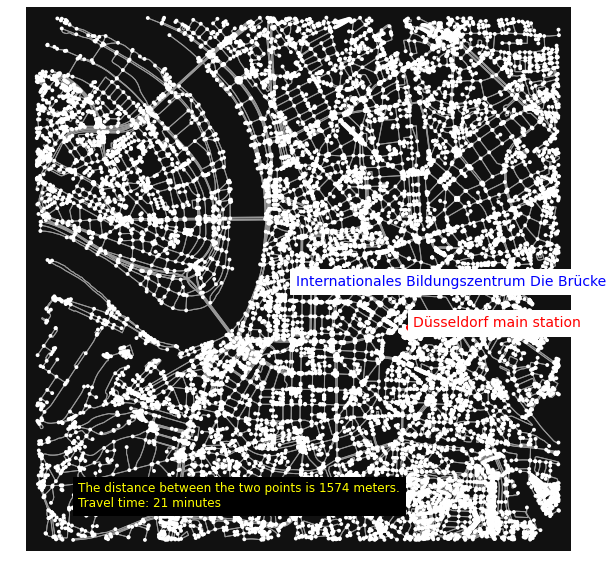

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


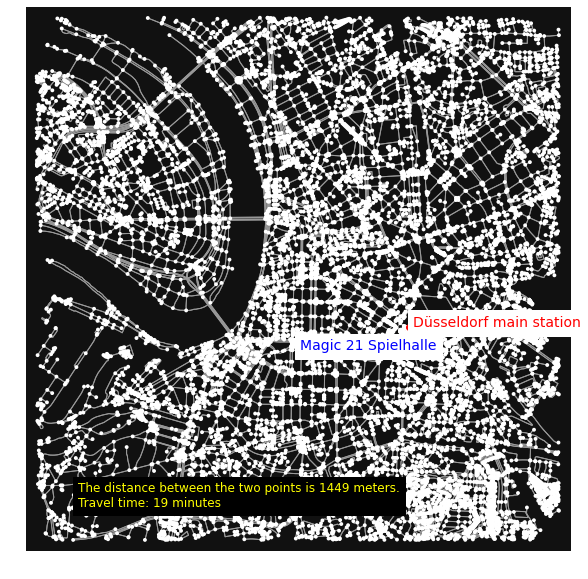

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


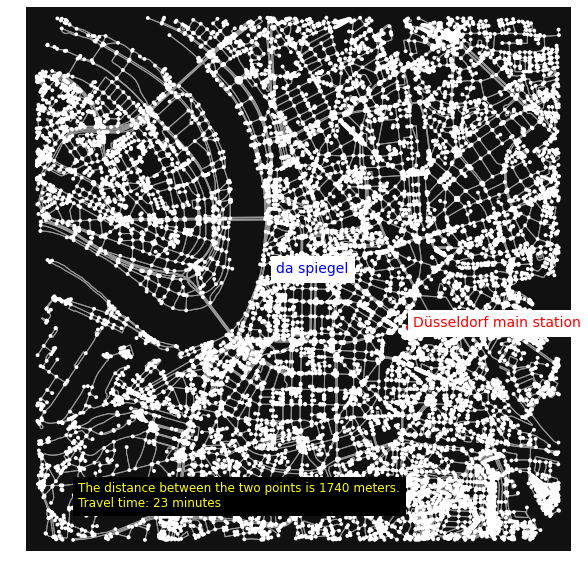

In [30]:
# loop through list of places, calculate distance and time, and plot map and information
for i in range(0,len(places_filt_df)):
    
    point_2 = places_filt_df.at[i, "geometry"]
    text_2 = places_filt_df.at[i, "name"]
    
    plot_map(point_1, text_1, point_2, text_2)

### Loop through all selected places and add information (distance, traveltime) to dataframe


In [31]:
# get list of places in Düsseldorf
# https://wiki.openstreetmap.org/wiki/Map_features#Transportation
#don't understand the link

tags = {'amenity':True, 'landuse':['retail','commercial','transportation', 'education']} 
places_df = ox.geometries.geometries_from_address(place, tags=tags)
places_df = places_df.reset_index(level=[0,1])
places_df

#why do we get these information again?

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


element_type      osmid           amenity  check_date  source  \
0            node  240270700         telephone  2021-03-12  survey   
1            node  240270717  parking_entrance         NaN     NaN   
2            node  240270723              cafe         NaN  survey   
3            node  240270745               pub         NaN  survey   
4            node  240270787          post_box         NaN     NaN   
...           ...        ...               ...         ...     ...   
1547     relation       8607            police         NaN     NaN   
1548     relation    1965896   public_building         NaN     NaN   
1549     relation    4785870            school         NaN     NaN   
1550     relation    6390053               NaN         NaN     NaN   
1551     relation   10542133               NaN         NaN     NaN   

                                               geometry  fee  \
0                              POINT (6.78976 51.22756)  NaN   
1                              POINT (6.78733 51.22615)  yes   
2                              POINT (6.78746 51.22174)  NaN   
3                              POINT (6.78796 51.22126)  NaN   
4                              POINT (6.78729 51.21945)  NaN   
...                                                 ...  ...   
1547  POLYGON ((6.76765 51.21569, 6.76763 51.21567, ...  NaN   
1548  POLYGON ((6.76966 51.22234, 6.76976 51.22248, ...  NaN   
1549  MULTIPOLYGON (((6.78731 51.23520, 6.78733 51.2...  NaN   
1550  POLYGON ((6.77846 51.22558, 6.77726 51.22556, ...  NaN   
1551  POLYGON ((6.77683 51.22302, 6.77697 51.22296, ...  NaN   

                          name       parking wheelchair  ...  \
0                          NaN           NaN        NaN  ...   
1            Karstadt Parkhaus  multi-storey        yes  ...   
2            Zaxopondeiva Cafe           NaN    limited  ...   
3        Wilma Next Generation           NaN    limited  ...   
4                          NaN           NaN        NaN  ...   
...                        ...           ...        ...  ...   
1547          Polizeipräsidium           NaN        yes  ...   
1548               Palais Spee           NaN        NaN  ...   
1549  Matthias-Claudius-Schule           NaN        NaN  ...   
1550                       NaN           NaN        NaN  ...   
1551                       NaN           NaN        NaN  ...   

     maxstay:conditional construction:end_date construction:start_date  \
0                    NaN                   NaN                     NaN   
1                    NaN                   NaN                     NaN   
2                    NaN                   NaN                     NaN   
3                    NaN                   NaN                     NaN   
4                    NaN                   NaN                     NaN   
...                  ...                   ...                     ...   
1547                 NaN                  1932                    1929   
1548                 NaN                   NaN                     NaN   
1549                 NaN                   NaN                     NaN   
1550                 NaN                   NaN                     NaN   
1551                 NaN                   NaN                     NaN   

     quitting_hours building:use:residential building:part room  \
0               NaN                      NaN           NaN  NaN   
1               NaN                      NaN           NaN  NaN   
2               NaN                      NaN           NaN  NaN   
3               NaN                      NaN           NaN  NaN   
4               NaN                      NaN           NaN  NaN   
...             ...                      ...           ...  ...   
1547            NaN                      NaN           NaN  NaN   
1548            NaN                      NaN           NaN  NaN   
1549            NaN                      NaN           NaN  NaN   
1550            NaN                      NaN           NaN  NaN   


In [32]:
# define main station as center / point 1
point_1 = Point(6.794692454576966, 51.22040873411635)
text_1 = "Düsseldorf main station"

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
# define list of important places
important_places_list = [
    "biergarten", "college", "gambling"
]

In [34]:
# filter by important places
places_filt_df = places_filt_df[places_filt_df["amenity"].isin(important_places_list)]
places_filt_df.reset_index(drop=True, inplace=True)
places_filt_df

element_type       osmid     amenity check_date source  \
0         node   481083583    gambling        NaN    NaN   
1         node   666210219     college        NaN    NaN   
2         node  2782005179     college        NaN    NaN   
3         node  4760469210    gambling        NaN    NaN   
4         node  7089723985  biergarten        NaN    NaN   

                   geometry  fee  \
0  POINT (6.77236 51.22637)  NaN   
1  POINT (6.78605 51.21875)  NaN   
2  POINT (6.77593 51.22467)  NaN   
3  POINT (6.77672 51.21801)  NaN   
4  POINT (6.77278 51.22600)  NaN   

                                                name parking wheelchair  ...  \
0                                  Merkur Spielothek     NaN        NaN  ...   
1  Düsseldorfer Akademie für Marketing-Kommunikation     NaN         no  ...   
2         Internationales Bildungszentrum Die Brücke     NaN        NaN  ...   
3                                Magic 21 Spielhalle     NaN        NaN  ...   
4                                         da spiegel     NaN        NaN  ...   

  maxstay:conditional construction:end_date construction:start_date  \
0                 NaN                   NaN                     NaN   
1                 NaN                   NaN                     NaN   
2                 NaN                   NaN                     NaN   
3                 NaN                   NaN                     NaN   
4                 NaN                   NaN                     NaN   

  quitting_hours building:use:residential building:part room  \
0            NaN                      NaN           NaN  NaN   
1            NaN                      NaN           NaN  NaN   
2            NaN                      NaN           NaN  NaN   
3            NaN                      NaN           NaN  NaN   
4            NaN                      NaN           NaN  NaN   

  parking:orientation ways building:roof:shape  
0                 NaN  NaN                 NaN  
1                 NaN  NaN                 NaN  
2                 NaN  NaN                 NaN  
3                 NaN  NaN                 NaN  
4                 NaN  NaN                 NaN  

[5 rows x 289 columns]

In [35]:
# drop irrelevant columns
places_filt_df = places_filt_df[["osmid", "amenity", "geometry", "name"]]
places_filt_df

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid     amenity                  geometry  \
0   481083583    gambling  POINT (6.77236 51.22637)   
1   666210219     college  POINT (6.78605 51.21875)   
2  2782005179     college  POINT (6.77593 51.22467)   
3  4760469210    gambling  POINT (6.77672 51.21801)   
4  7089723985  biergarten  POINT (6.77278 51.22600)   

                                                name  
0                                  Merkur Spielothek  
1  Düsseldorfer Akademie für Marketing-Kommunikation  
2         Internationales Bildungszentrum Die Brücke  
3                                Magic 21 Spielhalle  
4                                         da spiegel

In [36]:
# add center point
places_filt_df["center_point"] = point_1
places_filt_df

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


osmid     amenity                  geometry  \
0   481083583    gambling  POINT (6.77236 51.22637)   
1   666210219     college  POINT (6.78605 51.21875)   
2  2782005179     college  POINT (6.77593 51.22467)   
3  4760469210    gambling  POINT (6.77672 51.21801)   
4  7089723985  biergarten  POINT (6.77278 51.22600)   

                                                name  \
0                                  Merkur Spielothek   
1  Düsseldorfer Akademie für Marketing-Kommunikation   
2         Internationales Bildungszentrum Die Brücke   
3                                Magic 21 Spielhalle   
4                                         da spiegel   

                                  center_point  
0  POINT (6.794692454576966 51.22040873411635)  
1  POINT (6.794692454576966 51.22040873411635)  
2  POINT (6.794692454576966 51.22040873411635)  
3  POINT (6.794692454576966 51.22040873411635)  
4  POINT (6.794692454576966 51.22040873411635)

In [37]:
# function to calculate distance and travel time between two points
def calc_dist_and_time(point_1, point_2):
    
    # find node on map based on coordinates
    point_1_temp = (point_1.y, point_1.x)
    point_1_node = ox.get_nearest_node(G, point_1_temp)

    point_2_temp = (point_1.y, point_2.x)
    point_2_node = ox.get_nearest_node(G, point_2_temp)
    
    # calculate distance between two nodes
    dist_m = nx.shortest_path_length(G, point_1_node, point_2_node, weight='length')
    
    # calculate travel time based on 4.5km/h
    time = round(dist_m*0.0133)
    
    # return
    return dist_m, time

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
# calculate and add distance to defined center point (e.g., Düsseldorf Hbf)
places_filt_df["distance_in_m"] = places_filt_df.apply(
    lambda row: 
    calc_dist_and_time(point_1, row["geometry"])[0], 
    axis=1)

places_filt_df["travel_time"] = places_filt_df.apply(
    lambda row: 
    calc_dist_and_time(point_1, row["geometry"])[1], 
    axis=1)

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

In [60]:
places_filt_df

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid     amenity                  geometry  \
0   481083583    gambling  POINT (6.77236 51.22637)   
1   666210219     college  POINT (6.78605 51.21875)   
2  2782005179     college  POINT (6.77593 51.22467)   
3  4760469210    gambling  POINT (6.77672 51.21801)   
4  7089723985  biergarten  POINT (6.77278 51.22600)   

                                                name  \
0                                  Merkur Spielothek   
1  Düsseldorfer Akademie für Marketing-Kommunikation   
2         Internationales Bildungszentrum Die Brücke   
3                                Magic 21 Spielhalle   
4                                         da spiegel   

                                  center_point  distance_in_m  travel_time  
0  POINT (6.794692454576966 51.22040873411635)       1756.550           23  
1  POINT (6.794692454576966 51.22040873411635)        747.110           10  
2  POINT (6.794692454576966 51.22040873411635)       1573.618           21  
3  POINT (6.794692454576966 51.22040873411635)       1449.026           19  
4  POINT (6.794692454576966 51.22040873411635)       1739.756           23

In [46]:
placec_grouped=places_filt_df.groupby(["amenity"]).agg({'distance_in_m': 'min',
                                        'travel_time': 'min'})

In [71]:
placec_grouped

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


distance_in_m  travel_time
amenity                               
biergarten       1739.756           23
college           747.110           10
gambling         1449.026           19

In [40]:
# example for scoring (color on map)
import numpy as np
mean = np.mean(places_filt_df["travel_time"])
mean

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


19.2

In [48]:
# example for scoring (color on map)
import numpy as np
mean = np.mean(placec_grouped["travel_time"])
mean

#add to table nodes 

17.333333333333332

In [41]:
if mean<15:
    print("15 min point")
else:
    print("not 15 min point")
    
#mean in Tabelle schreiben 

not 15 min point


In [42]:
# turn Graph G into nodes to check distance
nodes, edges = ox.graph_to_gdfs(G)
nodes.head()

y         x  street_count highway  ref  \
osmid                                                      
5269985   51.198483  6.736442             3     NaN  NaN   
5270135   51.206686  6.756832             3     NaN  NaN   
5278499   51.215004  6.761004             1     NaN  NaN   
21556382  51.221888  6.791452             4     NaN  NaN   
21556383  51.220719  6.789764             4     NaN  NaN   

                          geometry  
osmid                               
5269985   POINT (6.73644 51.19848)  
5270135   POINT (6.75683 51.20669)  
5278499   POINT (6.76100 51.21500)  
21556382  POINT (6.79145 51.22189)  
21556383  POINT (6.78976 51.22072)

In [53]:
nodes=nodes.reset_index()

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
# how many nodes in the Graph
len(nodes)

#why do i need this information if i have a loop ?

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


16485

In [49]:
edges

osmid        highway  oneway  \
u          v          key                                                  
5269985    411736179  0                 150894409           path   False   
           877007745  0                 157381200        primary   False   
5270135    2383317837 0                 233131979        primary   False   
           1587141208 0                 229784432  tertiary_link   False   
           246701558  0    [224415555, 233131979]        primary   False   
...                                           ...            ...     ...   
9073233041 5709455899 0                 268606832       tertiary   False   
           9073233046 0                 980851836        service   False   
9073233046 9073233041 0                 980851836        service   False   
9073435149 1741795548 0                 162260479           path   False   
9073435150 1741795546 0                 162260474           path   False   

                           length lanes  ref               name maxspeed  \
u          v          key                                                  
5269985    411736179  0     5.471   NaN  NaN                NaN      NaN   
           877007745  0    73.360     2  B 1            Südring       70   
5270135    2383317837 0    16.325     4  B 1  Völklinger Straße       60   
           1587141208 0    15.488     2  NaN         Fährstraße       50   
           246701558  0    32.891     4  B 1  Völklinger Straße       60   
...                           ...   ...  ...                ...      ...   
9073233041 5709455899 0    15.595     4  NaN         Flurstraße       50   
           9073233046 0    68.926   NaN  NaN                NaN      NaN   
9073233046 9073233041 0    68.926   NaN  NaN                NaN      NaN   
9073435149 1741795548 0     6.961   NaN  NaN                NaN      NaN   
9073435150 1741795546 0    11.551   NaN  NaN                NaN      NaN   

                                                                    geometry  \
u          v          key                                                      
5269985    411736179  0      LINESTRING (6.73644 51.19848, 6.73643 51.19853)   
           877007745  0    LINESTRING (6.73644 51.19848, 6.73705 51.19845...   
5270135    2383317837 0      LINESTRING (6.75683 51.20669, 6.75679 51.20654)   
           1587141208 0    LINESTRING (6.75683 51.20669, 6.75679 51.20673...   
           246701558  0    LINESTRING (6.75683 51.20669, 6.75689 51.20690...   
...                                                                      ...   
9073233041 5709455899 0    LINESTRING (6.81349 51.22826, 6.81336 51.22821...   
           9073233046 0    LINESTRING (6.81349 51.22826, 6.81348 51.22828...   
9073233046 9073233041 0    LINESTRING (6.81307 51.22882, 6.81308 51.22877...   
9073435149 1741795548 0      LINESTRING (6.81110 51.22432, 6.81108 51.22426)   
9073435150 1741795546 0      LINESTRING (6.81117 51.22414, 6.81120 51.22425)   

                          tunnel access bridge   service width junction  
u          v          key                                                
5269985    411736179  0      NaN    NaN    NaN       NaN   NaN      NaN  
           877007745  0      NaN    NaN    NaN       NaN   NaN      NaN  
5270135    2383317837 0      NaN    NaN    NaN       NaN   NaN      NaN  
           1587141208 0      NaN    NaN    NaN       NaN   NaN      NaN  
           246701558  0      NaN    NaN    NaN       NaN   NaN      NaN  
...                          ...    ...    ...       ...   ...      ...  
9073233041 5709455899 0      NaN    NaN    NaN       NaN   NaN      NaN  
           9073233046 0      NaN    NaN    NaN  driveway   NaN      NaN  
9073233046 9073233041 0      NaN    NaN    NaN  driveway   NaN      NaN  
9073435149 1741795548 0      NaN    NaN    NaN       NaN   NaN      NaN  
9073435150 1741795546 0      NaN    NaN    NaN       NaN   NaN      NaN  

[44996 rows x 15 columns]

In [69]:
%%time
# loop through list of places, calculate distance and time, and plot map and information
for i in range(0,len(nodes.head(50))):   #change to flt
    temp_df= pd.DataFrame()
    for j in range(0,len(places_filt_df)):
        point_1 = nodes.at[i, "geometry"]
     
        
        point_2 = places_filt_df.at[j, "geometry"]
        amenity_2= places_filt_df.at[j, 'amenity']

        #print(f'point_1: {point_1}, point_2: {point_2}')
        
        meta_info2=calc_dist_and_time(point_1, point_2)
        #print(meta_info2)
        distance_m=meta_info2[0]
        distance_time=meta_info2[1]
        #temporäre Tabelle anlegen. Da sonst I wieder überschrieben wird
        temp_df.at[j,'minutes']=distance_time
        temp_df.at[j, 'amenity']=amenity_2
        
    places_grouped=temp_df.groupby(["amenity"]).agg({'minutes': 'min'})
    nodes.at[i,'avg_minutes']=places_grouped['minutes'].mean()



/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:3

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/osmnx/distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release

KeyboardInterrupt: 

In [65]:
nodes.head()

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid          y         x  street_count highway  ref  \
0   5269985  51.198483  6.736442             3     NaN  NaN   
1   5270135  51.206686  6.756832             3     NaN  NaN   
2   5278499  51.215004  6.761004             1     NaN  NaN   
3  21556382  51.221888  6.791452             4     NaN  NaN   
4  21556383  51.220719  6.789764             4     NaN  NaN   

                   geometry  avg_minutes  
0  POINT (6.73644 51.19848)    50.666667  
1  POINT (6.75683 51.20669)    18.333333  
2  POINT (6.76100 51.21500)    17.666667  
3  POINT (6.79145 51.22189)    14.000000  
4  POINT (6.78976 51.22072)    12.333333

In [83]:
nodes['15_minutes']=(nodes.head(289)['avg_minutes']<=15)
nodes.head(289)

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


osmid          y         x  street_count            highway  ref  \
0     5269985  51.198483  6.736442             3                NaN  NaN   
1     5270135  51.206686  6.756832             3                NaN  NaN   
2     5278499  51.215004  6.761004             1                NaN  NaN   
3    21556382  51.221888  6.791452             4                NaN  NaN   
4    21556383  51.220719  6.789764             4                NaN  NaN   
5    21556384  51.220109  6.791358             3                NaN  NaN   
6    21556391  51.217314  6.790160             4    traffic_signals  NaN   
7    21556392  51.217138  6.792389             3                NaN  NaN   
8    21556393  51.216705  6.793820             3                NaN  NaN   
9    25907905  51.231936  6.734768             5                NaN  NaN   
10   25907913  51.230251  6.745363             3                NaN  NaN   
11   25907916  51.231089  6.747270             3                NaN  NaN   
12   25907917  51.231392  6.747886             3           crossing  NaN   
13   25907918  51.231422  6.748421             3                NaN  NaN   
14   25907922  51.231430  6.748969             3                NaN  NaN   
15   25907929  51.231448  6.751855             3                NaN  NaN   
16   25907930  51.231091  6.751852             4                NaN  NaN   
17   25907933  51.230463  6.751322             4                NaN  NaN   
18   25907941  51.231227  6.748941             3                NaN  NaN   
19   25907950  51.231600  6.751744             3                NaN  NaN   
20   25907955  51.230927  6.752754             4                NaN  NaN   
21   25907959  51.231455  6.752734             4                NaN  NaN   
22   25907961  51.231607  6.752723             4                NaN  NaN   
23   25907970  51.231936  6.751755             3                NaN  NaN   
24   25907977  51.233299  6.749731             4                NaN  NaN   
25   25907980  51.235754  6.745976             3                NaN  NaN   
26   25908478  51.237830  6.744587             5                NaN  NaN   
27   25908480  51.239703  6.744323             3                NaN  NaN   
28   25908481  51.240555  6.744154             4                NaN  NaN   
29   25908482  51.241578  6.743738             3                NaN  NaN   
30   25908484  51.243714  6.742114             3                NaN  NaN   
31   25908490  51.246616  6.736857             3                NaN  NaN   
32   25908491  51.246856  6.735800             3                NaN  NaN   
33   25948724  51.199998  6.770574             4                NaN  NaN   
34   26815185  51.231648  6.775708             3                NaN  NaN   
35   26815187  51.232625  6.771729             4                NaN  NaN   
36   26815196  51.246448  6.768256             4                NaN  NaN   
37   26815199  51.243306  6.772010             4                NaN  NaN   
38   26815205  51.249014  6.771577             3                NaN  NaN   
39   26815206  51.250256  6.771409             3                NaN  NaN   
40   26815207  51.250511  6.770934             3                NaN  NaN   
41   26815208  51.250472  6.769959             3                NaN  NaN   
42   26815212  51.249597  6.767310             3                NaN  NaN   
43   26815215  51.247100  6.768781             4                NaN  NaN   
44   26815216  51.246819  6.769075             4                NaN  NaN   
45   26815220  51.248508  6.766281             4                NaN  NaN   
46   26815221  51.249876  6.764975             4                NaN  NaN   
47   26815222  51.251645  6.768702             3                NaN  NaN   
48   26852243  51.212375  6.782606             4           crossing  NaN   
49   26852254  51.204886  6.783597             4                NaN  NaN   
50   26852258  51.200864  6.788030             3                NaN  NaN   
51   26852265  51.203826  6.784327             4        

In [82]:
(nodes.head(289)['avg_minutes']<=15)

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0      False
1      False
2      False
3       True
4       True
5       True
6       True
7       True
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33      True
34      True
35      True
36      True
37      True
38      True
39      True
40      True
41      True
42      True
43      True
44      True
45      True
46     False
47     False
48      True
49      True
50      True
51      True
52      True
53     False
54     False
55     False
56      True
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

<AxesSubplot:xlabel='x', ylabel='y'>

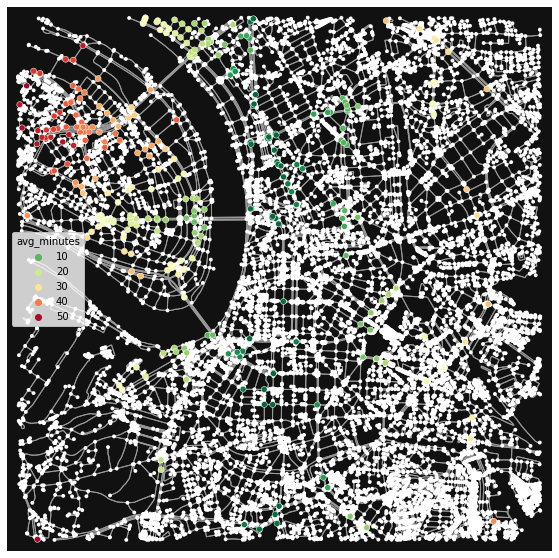

In [79]:
#Import Seaborn as sns
import seaborn as sns

#plot whole map
ox.plot_graph(G, figsize=(10, 10), show=False, close=False)
# Point of Interest

sns.scatterplot(data=nodes.head(289),x='x', y='y', hue= 'avg_minutes', palette='RdYlGn_r') # plot point of POI
    


/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:xlabel='x', ylabel='y'>

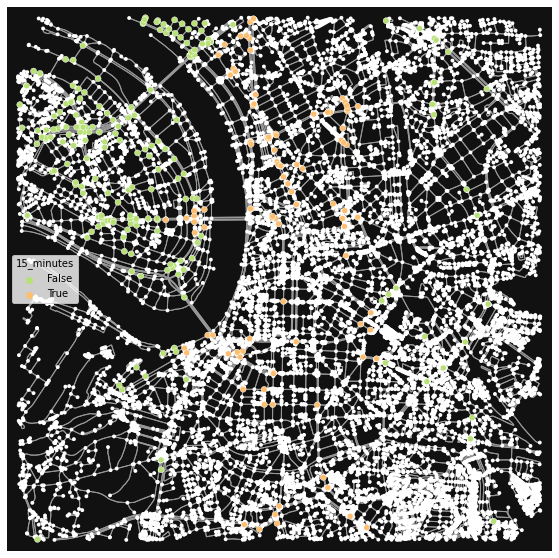

In [84]:
#Import Seaborn as sns
import seaborn as sns

#plot whole map
ox.plot_graph(G, figsize=(10, 10), show=False, close=False)
# Point of Interest

sns.scatterplot(data=nodes.head(289),x='x', y='y', hue= '15_minutes', palette='RdYlGn_r') # plot point of POI
    


In [72]:
print(len(nodes['avg_minutes']))

16485


/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [87]:
nodes.to_csv('nodes.csv', index= False)

In [89]:
import os
cwd = os.getcwd()
cwd

'/Users/philinesophie'

In [73]:
nodes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 16485 entries, 0 to 16484
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   osmid         16485 non-null  int64   
 1   y             16485 non-null  float64 
 2   x             16485 non-null  float64 
 3   street_count  16485 non-null  int64   
 4   highway       1614 non-null   object  
 5   ref           18 non-null     object  
 6   geometry      16485 non-null  geometry
 7   avg_minutes   290 non-null    float64 
dtypes: float64(3), geometry(1), int64(2), object(2)
memory usage: 1.0+ MB


In [ ]:
ox.plot_graph(G, figsize=(10, 10), show=False, close=False)

In [ ]:
plt.savefig()

#reduce nodes to save time by:
df.sample()
nodes.sample(100)

In [91]:
nodes_filt=nodes.sample(100)

/Users/philinesophie/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
